# Digit Classification using Dense Neural Network (DNN) - Version 2 
 - Using validation and test data 

## ==> Verify on Runtime tab if GPU is active on Runtime type

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Upload and Explore Dataset
[MNIST](http://yann.lecun.com/exdb/mnist/) handwritten digits dataset

The MNIST database of handwritten digits, is also available from this [TF page](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data), has a training set of 60,000 28x28 grayscale images of the 10 digits along a test set of 10,000 images. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.


In [2]:
data = tf.keras.datasets.mnist

(tt_images, tt_labels), (test_images, test_labels) = data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(tt_images.shape)
print(tt_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [5]:
tt_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

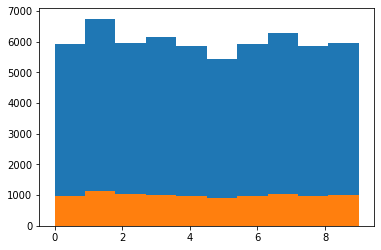

In [6]:
plt.hist(tt_labels);
plt.hist(test_labels);

In [7]:
val_images = tt_images[:10000]
val_labels = tt_labels[:10000]

In [8]:
train_images = tt_images[10000:]
train_labels = tt_labels[10000:]

In [9]:
print(train_images.shape)
print(train_labels.shape)

(50000, 28, 28)
(50000,)


In [10]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


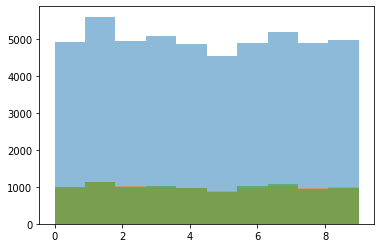

In [11]:
plt.hist(train_labels, alpha=0.5, label='Train')
plt.hist(test_labels, alpha=0.5, label='Val')
plt.hist(val_labels, alpha=0.5, label='Test');

     Label of image 1000 is: 9


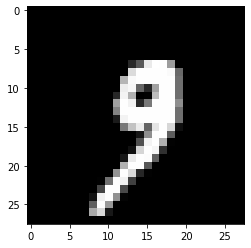

In [12]:
img = 1000
print("     Label of image {} is: {}".format(img, test_labels[img]))
plt.imshow(test_images[img], cmap='gray');

### Preprocessing Data 

**Normalizing Data**: 
We notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'.

In [13]:
train_images  = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

## Define and Compile Model

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(20, activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [16]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
#model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                15700     
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [17]:
def create_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='softmax')) 
  return model 

In [18]:
model = create_model()

In [19]:
model.compile(
    optimizer='adam', # uses default learning_rate=0.001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [20]:
from tensorflow.keras.optimizers import Adam, SGD

In [21]:
opt = Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

## Train the model

You could leave the training data with all samples, and alternativelly use: 
- `validation_split=0.1` instead of `validation_data=(val_images, val_labels)`.

In this case, TF will split the validation data by itself. 

In [22]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(val_images, val_labels) 
    )

Epoch 1/20
1563/1563 [==============================] - 9s 4ms/step - loss: 0.3213 - accuracy: 0.9051 - val_loss: 0.2333 - val_accuracy: 0.9332
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2215 - accuracy: 0.9354 - val_loss: 0.2289 - val_accuracy: 0.9338
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2005 - accuracy: 0.9414 - val_loss: 0.2353 - val_accuracy: 0.9316
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1865 - accuracy: 0.9451 - val_loss: 0.2452 - val_accuracy: 0.9334
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1866 - accuracy: 0.9446 - val_loss: 0.2461 - val_accuracy: 0.9305
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1751 - accuracy: 0.9478 - val_loss: 0.2186 - val_accuracy: 0.9454
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1748 - accuracy: 0.9494 - val_loss: 0.2232 - val_accuracy:

Inspecting the model

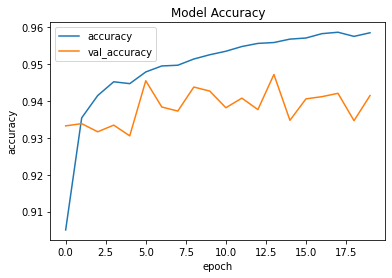

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

If validation accuracy seems “instable”, could be that Learning Rate is high (try to reduce it). 

Let's start over with a lower Lr (for exampe: 0.0001)

In [24]:
opt = Adam(learning_rate=0.0001)

model = create_model()
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(val_images, val_labels) 
    )

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0737 - accuracy: 0.7167 - val_loss: 0.5739 - val_accuracy: 0.8609
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4899 - accuracy: 0.8720 - val_loss: 0.4165 - val_accuracy: 0.8915
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3924 - accuracy: 0.8916 - val_loss: 0.3620 - val_accuracy: 0.9012
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3494 - accuracy: 0.9015 - val_loss: 0.3332 - val_accuracy: 0.9087
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3243 - accuracy: 0.9084 - val_loss: 0.3160 - val_accuracy: 0.9104
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3073 - accuracy: 0.9130 - val_loss: 0.3032 - val_accuracy: 0.9149
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.9168 - val_loss: 0.2917 - val_accuracy:

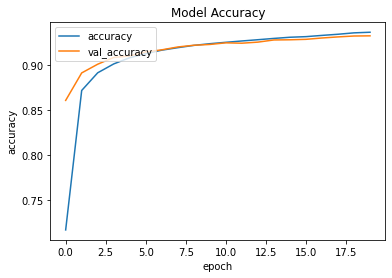

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

## Testing the trained model


In [26]:
model.evaluate(train_images, train_labels)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.2191 - accuracy: 0.9383


[0.21905943751335144, 0.938260018825531]

In [27]:
model.evaluate(val_images, val_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2351 - accuracy: 0.9328


[0.23511266708374023, 0.9327999949455261]

In [28]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2290 - accuracy: 0.9360


[0.22895950078964233, 0.9359999895095825]

**Accuracy**
- Train: 0.97; 
- Validation: 0.96 
- Test: 0.95

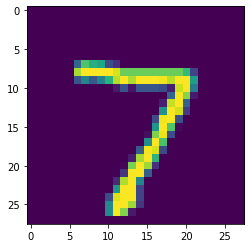

In [29]:
plt.imshow(test_images[0]);

In [30]:
print(test_labels[0])

7


In [31]:
predictions = model.predict(test_images)
print(predictions[0])

[9.55202486e-05 6.39327169e-08 2.87630042e-04 3.14334454e-03
 1.84103669e-07 1.04762206e-04 3.52122456e-08 9.96189654e-01
 5.18725028e-06 1.73622102e-04]


In [32]:
# Returns the indices of the maximum values along an axis.
np.argmax(predictions[0])

7

In [33]:
predictions = np.argmax(predictions, axis=-1)
predictions.shape

(10000,)

In [34]:
predictions[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.93      0.90      0.92      1010
           4       0.93      0.95      0.94       982
           5       0.93      0.90      0.91       892
           6       0.95      0.96      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.89      0.93      0.91       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [36]:
confusion_matrix(test_labels,predictions)

array([[ 965,    0,    1,    1,    0,    4,    4,    1,    4,    0],
       [   0, 1110,    3,    2,    1,    1,    3,    2,   13,    0],
       [  11,    1,  946,    8,    9,    3,   11,    9,   30,    4],
       [   2,    0,   21,  910,    2,   28,    0,   13,   27,    7],
       [   1,    1,    3,    0,  932,    0,   12,    4,    9,   20],
       [   7,    3,    4,   22,   10,  802,   14,    5,   18,    7],
       [   8,    3,    5,    0,    7,   10,  921,    1,    3,    0],
       [   2,    8,   19,    6,    8,    0,    0,  945,    4,   36],
       [   6,    3,    5,   16,    9,   12,    9,    7,  902,    5],
       [  10,    6,    2,   11,   24,    6,    0,   18,    5,  927]])

In [38]:
!pip install seaborn

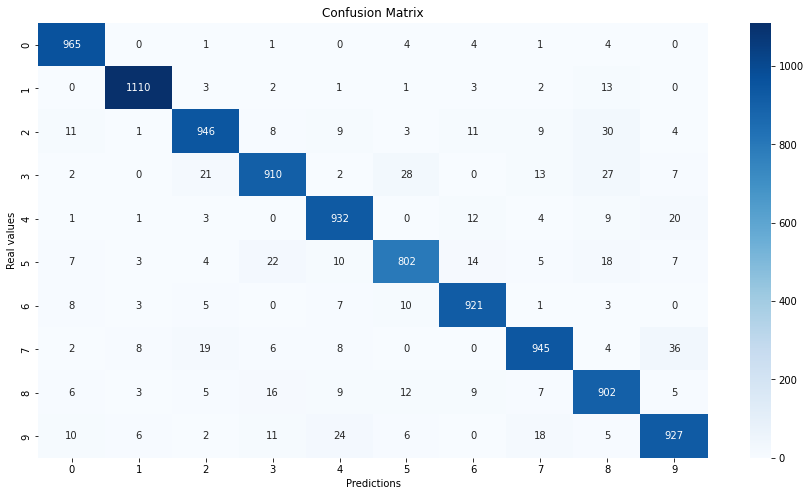

In [39]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap="Blues", annot=True, fmt='g');
plt.title('Confusion Matrix')
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.show()

In [ ]:
model.save('MNIST_v2_model.h5')

Use [Netron](https://netron.app) to visualize the model, hyperparameters, tensor shapes, etc. Netron is a viewer for neural network, deep learning and machine learning models (See [GitHub](https://github.com/lutzroeder/netron) for instructions about instalation in your desktop). 